In [3]:
import seaborn as sns
import pandas as pd


In [4]:
df_train = pd.read_csv("../data/application_train.csv")
df_test = pd.read_csv("../data/application_test.csv")
TARGET = df_train['TARGET']


In [5]:
test_id = df_test.iloc[:, 0]
train_id = df_train.iloc[:, 0]

In [6]:
def get_type(x):
    if isinstance(x[0], str):
        return 0
    if len( np.unique(x[:400])) < 15:
        return 0
    else:
        return 1
    
def plot(x):
    global TARGET
    _type = get_type(x)
    if _type == 0:
        discrete_plot(x, TARGET)
    else:
        continuous_plot(x, TARGET)
    
def discrete_plot(x, y):
    temp = pd.concat((x, y), axis=1)
    temp['value'] = 1
    temp = temp.dropna()
    temp.groupby(list(temp.columns)[:2]).sum().unstack().plot(kind='bar')
    print(temp.groupby([temp.columns[0]])['TARGET'].mean())
    print(temp.groupby([temp.columns[0]])['TARGET'].count())

def continuous_plot(x, y):
    x = x.dropna()
    sns.distplot(x.loc[y==0])
    sns.distplot(x.loc[y==1])


In [7]:
y_train = df_train['TARGET']
df_train = df_train.iloc[:, 2:]
df_test = df_test.iloc[:, 1:]

# NEW EDA

In [15]:
value = 365243

In [18]:
df_train.columns[np.array(list(map(lambda x: sum(df_train[x] == value), df_train.columns))) != 0]

Index(['DAYS_EMPLOYED'], dtype='object')

In [20]:
df_train['a'] = list(map(lambda x: 1 if x == value else 0, df_train.DAYS_EMPLOYED))


a
0    0.086600
1    0.053996
Name: TARGET, dtype: float64
a
0    252137
1     55374
Name: TARGET, dtype: int64


/home/ray/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


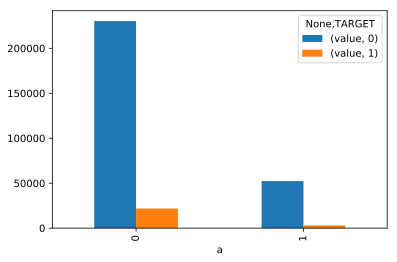

In [21]:
plot(df_train['a'])

In [6]:
df_train['b1'] = df_train.EXT_SOURCE_1.map(lambda x: 1 if pd.isnull(x) else 0)
df_train['b2'] = df_train.EXT_SOURCE_2.map(lambda x: 1 if pd.isnull(x) else 0)
df_train['b3'] = df_train.EXT_SOURCE_2.map(lambda x: 1 if pd.isnull(x) else 0)

b3
0    0.080733
1    0.078788
Name: TARGET, dtype: float64
b3
0    306851
1       660
Name: TARGET, dtype: int64


/home/ray/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


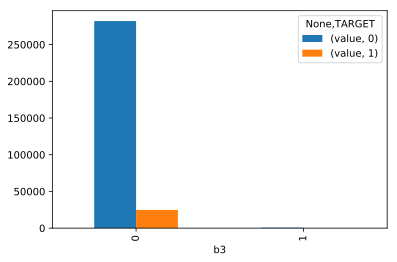

In [9]:
plot(df_train['b3'])

In [18]:
from collections import Counter
res = []
for col in df_train.columns:
    temp = df_train[col].map(lambda x: 1 if pd.isnull(x) else 0)
    counter = Counter(list(zip(temp, TARGET)))
    if (counter[(1, 1)] + counter[(1, 0)]) == 0 or (counter[(0, 1)] + counter[(0, 0)]) == 0:
        continue
    ratio_1 = counter[(1, 1)] / (counter[(1, 1)] + counter[(1, 0)])
    ratio_2 = counter[(0, 1)] / (counter[(0, 1)] + counter[(0, 0)])
    if abs(ratio_1 - ratio_2) > 0.02:
        print("%s, %.2f, %.2f, %s" % (col, ratio_1, ratio_2, (counter[(1, 1)] + counter[(1, 0)])))
        if (counter[(1, 1)] + counter[(1, 0)]) > 10000:
            res.append(col)
    

AMT_ANNUITY, 0.00, 0.08, 12
NAME_TYPE_SUITE, 0.05, 0.08, 1292
OCCUPATION_TYPE, 0.07, 0.09, 96391
CNT_FAM_MEMBERS, 0.00, 0.08, 2
APARTMENTS_AVG, 0.09, 0.07, 156061
BASEMENTAREA_AVG, 0.09, 0.07, 179943
YEARS_BEGINEXPLUATATION_AVG, 0.09, 0.07, 150007
ELEVATORS_AVG, 0.09, 0.07, 163891
ENTRANCES_AVG, 0.09, 0.07, 154828
FLOORSMAX_AVG, 0.09, 0.07, 153020
LIVINGAREA_AVG, 0.09, 0.07, 154350
NONLIVINGAREA_AVG, 0.09, 0.07, 169682
APARTMENTS_MODE, 0.09, 0.07, 156061
BASEMENTAREA_MODE, 0.09, 0.07, 179943
YEARS_BEGINEXPLUATATION_MODE, 0.09, 0.07, 150007
ELEVATORS_MODE, 0.09, 0.07, 163891
ENTRANCES_MODE, 0.09, 0.07, 154828
FLOORSMAX_MODE, 0.09, 0.07, 153020
LIVINGAREA_MODE, 0.09, 0.07, 154350
NONLIVINGAREA_MODE, 0.09, 0.07, 169682
APARTMENTS_MEDI, 0.09, 0.07, 156061
BASEMENTAREA_MEDI, 0.09, 0.07, 179943
YEARS_BEGINEXPLUATATION_MEDI, 0.09, 0.07, 150007
ELEVATORS_MEDI, 0.09, 0.07, 163891
ENTRANCES_MEDI, 0.09, 0.07, 154828
FLOORSMAX_MEDI, 0.09, 0.07, 153020
LIVINGAREA_MEDI, 0.09, 0.07, 154350
NONLIVINGA

In [19]:
len(res)

35

In [20]:
res

['OCCUPATION_TYPE',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

# NEW EDA END

In [388]:
ext_1_train = df_train['EXT_SOURCE_1']
ext_1_test = df_test['EXT_SOURCE_1']

In [389]:
feature_by_missing = df_train.columns[df_train.isnull().sum()/df_train.shape[0] >= 0.4]

### 添加 [kernel](https://www.kaggle.com/poohtls/fork-of-fork-lightgbm-with-simple-features/code) 中的特征

In [390]:
len_train = df_train.shape[0]
len_test = df_test.shape[0]

In [391]:
df = df_train.append(df_test).reset_index()

In [392]:
docs = [_f for _f in df.columns if 'FLAG_DOC' in _f]
live = [_f for _f in df.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f) & ('_FLAG_' not in _f)]

In [393]:
# A lot of the continuous days variables have integers as missing value indicators.
def mean_std(x):
    return (x - np.mean(x)) / np.std(x)

df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

inc_by_org = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
df['NEW_CREDIT_TO_GOODS_RATIO'] = mean_std(df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'])
df['NEW_DOC_IND_KURT'] = mean_std(df[docs].kurtosis(axis=1))
df['NEW_LIVE_IND_SUM'] = mean_std(df[live].sum(axis=1))
df['NEW_INC_PER_CHLD'] = mean_std(df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN']))
df['NEW_INC_BY_ORG'] = mean_std(df['ORGANIZATION_TYPE'].map(inc_by_org))
df['NEW_EMPLOY_TO_BIRTH_RATIO'] = mean_std(df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'])
df['NEW_ANNUITY_TO_INCOME_RATIO'] = mean_std(df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL']))
df['NEW_SOURCES_PROD'] = mean_std(df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3'])
df['NEW_EXT_SOURCES_MEAN'] = mean_std(df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1))
df['NEW_SCORES_STD'] = mean_std(df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1))
df['NEW_SCORES_STD'] = mean_std(df['NEW_SCORES_STD'].fillna(df['NEW_SCORES_STD'].mean()))
df['NEW_CAR_TO_BIRTH_RATIO'] = mean_std(df['OWN_CAR_AGE'] / df['DAYS_BIRTH'])
df['NEW_CAR_TO_EMPLOY_RATIO'] = mean_std(df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED'])
df['NEW_PHONE_TO_BIRTH_RATIO'] = mean_std(df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH'])
df['NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = mean_std(df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED'])
df['NEW_CREDIT_TO_INCOME_RATIO'] = mean_std(df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'])
df['LOAN_INCOME_RATIO'] = mean_std(df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'])
df['ANNUITY_INCOME_RATIO'] = mean_std(df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL'])

# Number of overall payments (I think!)
df['ANNUITY LENGTH'] = mean_std(df['AMT_CREDIT'] / df['AMT_ANNUITY'])

# Social features
df['WORKING_LIFE_RATIO'] = mean_std(df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'])
df['INCOME_PER_FAM'] = mean_std(df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS'])
df['CHILDREN_RATIO'] = mean_std(df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS'])

In [394]:
dropcolum=['index']
df= df.drop(dropcolum,axis=1)

In [395]:
df_train = df.iloc[: len_train]
df_test = df.iloc[len_train: , ]

In [396]:
df_train = df_train[[i for i in df_train.columns if i not in feature_by_missing]]
df_test = df_test[[i for i in df_train.columns if i not in feature_by_missing]]

In [397]:
columns = df_train.columns
drop_num  = []

In [398]:
df_train.iloc[:, 4] = list(map(lambda x: 5 if x >= 5 else x, df_train.iloc[:, 4])) 
df_test.iloc[:, 4] = list(map(lambda x: 5 if x >= 5 else x, df_test.iloc[:, 4]))

In [399]:
def replace(x):
    s = 50000
    for i in range(12):
        if x < s + 25000 * i:
            return str(i)
    return '12'

df_train.iloc[:, 5] = list(map(lambda x:  replace(x), df_train.iloc[:, 5]))
df_test.iloc[:, 5] = list(map(lambda x:  replace(x), df_test.iloc[:, 5]))

In [400]:
def replace(x):
    s = 600000
    for i in range(10):
        if x < s + 100000 * i:
            return str(i)
    return '10'

df_train.iloc[:, 6] = list(map(lambda x:  replace(x) if not pd.isnull(x) else x, df_train.iloc[:, 6]))
df_test.iloc[:, 6] = list(map(lambda x:  replace(x) if not pd.isnull(x) else x, df_test.iloc[:, 6]))

In [401]:

df_test.iloc[:, 7] = mean_std(np.log(df_test.iloc[:, 7]))
df_train.iloc[:, 7] = mean_std(np.log(df_train.iloc[:, 7]))

In [402]:
def replace(x):
    s = 400000
    for i in range(4):
        if x < s + 200000 * i:
            return str(i)
    return '4'

df_train.iloc[:, 8] = list(map(lambda x:  replace(x) if not pd.isnull(x) else x, df_train.iloc[:, 8]))
df_test.iloc[:, 8] = list(map(lambda x:  replace(x) if not pd.isnull(x) else x, df_test.iloc[:, 8]))
# plot(df_train.iloc[:, 8])

In [403]:
map_dic = {
    'Children' : '1',
    'Family' : '1',
    'Spouse, partner': '1',
    'Unaccompanied' : '0',
    'Group of people': '2',
    'Other_A': '2',
    'Other_B': '2',
}

df_train.iloc[:, 9] = list(map(lambda x: map_dic[x] if not pd.isnull(x) else x, df_train.iloc[:, 9]))
df_test.iloc[:, 9] = list(map(lambda x: map_dic[x] if not pd.isnull(x) else x, df_test.iloc[:, 9]))

In [404]:
map_dic = {
    'Businessman':'bus_and_stu', 'Student':'bus_and_stu', 
    'Maternity leave': 'mat_and_une', 'Unemployed':'mat_and_une'
}

df_train.iloc[:, 10] = list(map(lambda x: map_dic[x] if x in map_dic else x, df_train.iloc[:, 10]))
df_test.iloc[:, 10] = list(map(lambda x: map_dic[x] if x in map_dic else x, df_test.iloc[:, 10]))

In [405]:
df_train.iloc[:, 14] = pd.Series(list(map(lambda x: 1 if x >= 0.03 else 0 if not pd.isnull(x) else x, df_train.iloc[:, 14])))
df_test.iloc[:, 14] = pd.Series(list(map(lambda x: 1 if x >= 0.03 else 0 if not pd.isnull(x) else x, df_test.iloc[:, 14])))

In [406]:
## 重要特征！
df_train['days_birth_dummy'] = list(map(lambda x: 1 if x > -15000 else 0 if not pd.isnull(x) else x, df_train.iloc[:, 15]))
df_test['days_birth_dummy'] = list(map(lambda x: 1 if x > -15000 else 0 if not pd.isnull(x) else x, df_test.iloc[:, 15]))
df_train.iloc[:, 15] = mean_std(df_train.iloc[:, 15])
df_test.iloc[:, 15] = mean_std(df_test.iloc[:, 15])

In [407]:
df_train['days_employed_dummy'] = df_train.iloc[:, 16].map(lambda x: '2' if x>0 else '1' if x > -2100 else '0' if not pd.isnull(x) else x)
df_test['days_employed_dummy'] = df_test.iloc[:, 16].map(lambda x: '2' if x>0 else '1' if x > -2100 else '0' if not pd.isnull(x) else x)


df_test.iloc[:, 16] = mean_std(df_test.iloc[:, 16].map(lambda x: np.nan if x>0 else x))
df_train.iloc[:, 16] = mean_std(df_train.iloc[:, 16].map(lambda x: np.nan if x>0 else x))


In [408]:
df_train['days_registration_dummy'] = df_train.iloc[:, 17].map(lambda x: 1 if x> -6000 else 0 if not pd.isnull(x) else x)
df_test['days_registration_dummy'] = df_test.iloc[:, 17].map(lambda x: 1 if x>-6000 else 0 if not pd.isnull(x) else x)

df_test.iloc[:, 17] = mean_std(df_test.iloc[:, 17])
df_train.iloc[:, 17] = mean_std(df_train.iloc[:, 17])

In [409]:
df_train['days_idpub_dummy'] = df_train.iloc[:, 18].map(lambda x: 1 if x> -3100 else 0 if not pd.isnull(x) else x)
df_test['days_idpub_dummy'] = df_test.iloc[:, 18].map(lambda x: 1 if x>-3100 else 0 if not pd.isnull(x) else x)

df_test.iloc[:, 18] = mean_std(df_test.iloc[:, 18])
df_train.iloc[:, 18] = mean_std(df_train.iloc[:, 18])

In [410]:
#df_train = df_train.drop(columns=columns[19])
#df_test = df_test.drop(columns=columns[19])
drop_num.append(19)

In [411]:
drop_num.append(22)

In [412]:
df_train.iloc[:, 26] = df_train.iloc[:, 26].map(lambda x: 6 if x >= 6 else x)
df_test.iloc[:, 26] = df_test.iloc[:, 26].map(lambda x: 6 if x >= 6 else x)

In [413]:
df_train.iloc[:, 30] = df_train.iloc[:, 30].map(lambda x: 1 if x >= 13 else 0 if not pd.isnull(x) else x)
df_test.iloc[:, 30] = df_test.iloc[:, 30].map(lambda x: 1 if x >= 13 else 0 if not pd.isnull(x) else x)


In [414]:
# TODO High-Cardinality Categorical  Cluster
drop_num.append(35)
# plot(df_train.iloc[:, 35])

In [415]:
df_train['ext_source_2_dummy'] = df_train.iloc[:, 38].map(lambda x: 1 if x> 0.5 else 0 if not pd.isnull(x) else x)
df_test['ext_source_2_dummy'] = df_test.iloc[:, 38].map(lambda x: 1 if x> 0.5 else 0 if not pd.isnull(x) else x)

df_test.iloc[:, 38] = mean_std(df_test.iloc[:, 38])
df_train.iloc[:, 38] = mean_std(df_train.iloc[:, 38])

In [416]:
df_train['ext_source_3_dummy'] = df_train.iloc[:, 39].map(lambda x: 1 if x> 0.42 else 0 if not pd.isnull(x) else x)
df_test['ext_source_3_dummy'] = df_test.iloc[:, 39].map(lambda x: 1 if x> 0.42 else 0 if not pd.isnull(x) else x)

df_test.iloc[:, 39] = mean_std(df_test.iloc[:, 39])
df_train.iloc[:, 39] = mean_std(df_train.iloc[:, 39])

In [417]:
df_train.iloc[:, 40] = df_train.iloc[:, 40].map(lambda x: x if x < 5   else np.nan)
df_test.iloc[:, 40] = df_test.iloc[:, 40].map(lambda x: x if x < 5  else np.nan)

In [418]:
df_train.iloc[:, 41] = df_train.iloc[:, 41].map(lambda x: x if x <= 5 else np.nan)
df_test.iloc[:, 41] = df_test.iloc[:, 41].map(lambda x: x if x <= 5 else np.nan)

In [419]:
df_train.iloc[:, 42] = df_train.iloc[:, 42].map(lambda x: x if x <= 5 else np.nan)
df_test.iloc[:, 42] = df_test.iloc[:, 42].map(lambda x: x if x <= 5 else np.nan)

In [420]:
df_train.iloc[:, 43] = df_train.iloc[:, 43].map(lambda x: x if x <= 2 else 3 if  not pd.isnull(x) else x)
df_test.iloc[:, 43] = df_test.iloc[:, 43].map(lambda x: x if x <= 2 else 3 if  not pd.isnull(x) else x)

In [421]:
df_train.iloc[:, 44] = df_train.iloc[:, 44].map(lambda x: '0' if x < -1000 else '1' if x < 0 else '2' if not pd.isnull(x) else x)
df_test.iloc[:, 44] = df_test.iloc[:, 44].map(lambda x: '0' if x < -1000 else '1' if x < 0 else '2' if not pd.isnull(x) else x)

In [422]:
drop_num.append(45)
drop_num.append(47)
drop_num.append(48)

In [423]:
drop_num.append(53)

In [424]:
drop_num.append(55)

In [425]:
df_train.iloc[:, 65] = df_train.iloc[:, 65].map(lambda x: '0' if x ==0 else '1' if  not pd.isnull(x) else x)
df_test.iloc[:, 65] = df_test.iloc[:, 65].map(lambda x: '0' if x ==0 else '1' if  not pd.isnull(x) else x)

In [426]:
df_train.iloc[:, 66] = df_train.iloc[:, 66].map(lambda x: '0' if x ==0 else '1' if  not pd.isnull(x) else x)
df_test.iloc[:, 66] = df_test.iloc[:, 66].map(lambda x: '0' if x ==0 else '1' if  not pd.isnull(x) else x)

In [427]:
df_train.iloc[:, 67] = df_train.iloc[:, 67].map(lambda x:  '0' if x ==0 else '1' if  not pd.isnull(x) else x)
df_test.iloc[:, 67] = df_test.iloc[:, 67].map(lambda x:  '0' if x ==0 else '1' if  not pd.isnull(x) else x)

In [428]:
df_train.iloc[:, 68] = df_train.iloc[:, 68].map(lambda x:  '0' if x ==0 else '1' if  not pd.isnull(x) else x)
df_test.iloc[:, 68] = df_test.iloc[:, 68].map(lambda x:  '0' if x ==0 else '1' if  not pd.isnull(x) else x)

In [429]:
df_train.iloc[:, 69] = df_train.iloc[:, 69].map(lambda x: 2 if x >= 2 else x)
df_test.iloc[:, 69] = df_test.iloc[:, 69].map(lambda x: 2 if x >= 2 else x)

In [430]:
df_train.iloc[:, 70] = df_train.iloc[:, 70].map(lambda x: 5 if x >= 5 else x)
df_test.iloc[:, 70] = df_test.iloc[:, 70].map(lambda x: 5 if x >= 5 else x)

In [431]:
df_train = df_train.drop(columns=columns[drop_num])
df_test = df_test.drop(columns=columns[drop_num])

In [432]:
df_train['EXT_SOURCE_1'] = ext_1_train
df_test['EXT_SOURCE_1'] = ext_1_test

In [433]:
dropcolum=['FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_11','FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df_train= df_train.drop(dropcolum,axis=1)
df_test= df_test.drop(dropcolum,axis=1)

In [434]:
df_train.index = train_id
df_test.index = test_id

In [454]:
df_train.to_csv('../data/handled/main_train_2.csv')
df_test.to_csv('../data/handled/main_test_2.csv')

# 测试


In [377]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from bayes_opt import BayesianOptimization
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

/home/ray/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [378]:
x = pd.get_dummies(df_train).values
y = TARGET.values

In [379]:
imp = Imputer()
x = imp.fit_transform(x)

In [437]:
sfm = SelectFromModel(LogisticRegression(penalty='l1', C=0.2))
x = sfm.fit_transform(x, y)

In [439]:
lr = LogisticRegression()
cross_val_score(lr, x, y, scoring='roc_auc')

array([0.74859571, 0.7474503 , 0.75273227])

In [443]:
df_train_dummy = pd.get_dummies(df_train, dummy_na=True)
df_test_dummy = pd.get_dummies(df_test, dummy_na=True)

train, test = df_train_dummy.align(df_test_dummy, join='left', axis=1, fill_value=0)

In [444]:
imp = Imputer()
train = imp.fit_transform(train)
test = imp.transform(test)

In [445]:
sfm = SelectFromModel(LogisticRegression(penalty='l1', C=0.3))
train = sfm.fit_transform(train, y)
test = sfm.transform(test)

In [447]:
lr.fit(train, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [451]:
def output(test_id, test_prob, sid=0):
    result = pd.DataFrame(np.column_stack((test_id, test_prob)))
    result.columns = ['SK_ID_CURR', 'TARGET']
    result['SK_ID_CURR'] = result['SK_ID_CURR'].astype('int')
    result.to_csv('./submission/submission' + str(sid) + '.csv', header=True, index=False)

In [452]:
test_id = df_test.index

In [453]:
pre = lr.predict_proba(test)
output(test_id, pre[:, 1], '_20180707')

In [64]:
import autosklearn.classification as ac
automl = ac.AutoSklearnClassifier()
automl.fit(train, y)
pred = automl.predict_proba(test)


[ERROR] [2018-07-02 09:04:12,642:AutoML(1):025aa001a19a3b418133b21a247be1f6] Error creating dummy predictions: {'error': 'Memout (used more than 3072 MB).', 'configuration_origin': 'DUMMY'} 
[WARNING] [2018-07-02 09:04:15,189:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-07-02 09:04:15,189:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


ValueError: No models fitted!